**Decision Tree Learning - Removing ManualWheel feature**

[ManualWheel is the most important feature. However its importance does not make sense in an experimental scenario as it is a feature in use during the manual mode of the vehicle and not the autonomous mode. Hence we experiment decision tree learning without including ManualWheel feature.]

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from pandas import DataFrame
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
cd drive/MyDrive/

*************************************



**Decision Tree Learning**

In [ ]:
df = pd.read_csv("v3.2.2_train.csv")

# Training data
X = df.iloc[:, 1:26]
X_new = X.drop(['ManualWheel'], axis=1)
print(X_new.shape)
# Labels
y = df.iloc[:, 26:]
y_label = list(y.columns)
lst_labels = []
for index, row in y.iterrows():
    loc = np.where(np.asarray(row) == 1)[0][0]
    lst_labels.append(y_label[loc])

# Target values ['TOT_fast', 'TOT_med_fast', 'TOT_med', 'TOT_med_slow', 'TOT_slow']
Y = DataFrame(lst_labels, columns=['Target'])

# Split in train/test
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=1)


(1066690, 25)
(1066690, 24)


In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 7, 
                             random_state = 0)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

pred = clf.predict(X_test)

In [ ]:
# Accuracy of predictions using decision tree learning 
sklearn.metrics.accuracy_score(pred, y_test)

0.44507151406062995

**Visualization with Graphviz**

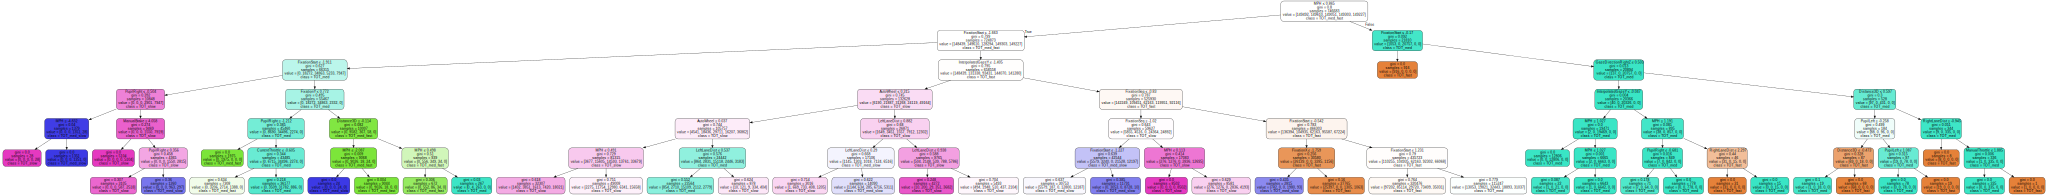

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=list(X_train.columns),  
                      class_names=y_label,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

**Print all rules using export_text**

In [ ]:
r = export_text(clf, feature_names = list(X_train.columns))
print(r)

|--- MPH <= 0.87
|   |--- FixationStart <= -1.66
|   |   |--- FixationStart <= -1.91
|   |   |   |--- PupilRight <= -0.50
|   |   |   |   |--- MPH <= -4.83
|   |   |   |   |   |--- class: TOT_slow
|   |   |   |   |--- MPH >  -4.83
|   |   |   |   |   |--- class: TOT_med_slow
|   |   |   |--- PupilRight >  -0.50
|   |   |   |   |--- ManualBrake <= 4.06
|   |   |   |   |   |--- class: TOT_slow
|   |   |   |   |--- ManualBrake >  4.06
|   |   |   |   |   |--- PupilRight <= 0.36
|   |   |   |   |   |   |--- class: TOT_slow
|   |   |   |   |   |--- PupilRight >  0.36
|   |   |   |   |   |   |--- class: TOT_med_slow
|   |   |--- FixationStart >  -1.91
|   |   |   |--- FixationY <= 0.77
|   |   |   |   |--- PupilRight <= -1.21
|   |   |   |   |   |--- class: TOT_med
|   |   |   |   |--- PupilRight >  -1.21
|   |   |   |   |   |--- CurrentThrottle <= -0.60
|   |   |   |   |   |   |--- class: TOT_med
|   |   |   |   |   |--- CurrentThrottle >  -0.60
|   |   |   |   |   |   |--- class: TOT_med_f

In [ ]:
X_new.columns

Index(['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX',
       'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft',
       'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle',
       'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH',
       'ManualBrake', 'ManualThrottle', 'RangeW', 'RightLaneDist',
       'RightLaneType', 'LeftLaneDist', 'LeftLaneType'],
      dtype='object')

**Datapoints satisfying a rule [Accuracy on test set]**

MPH <= 0.865 & FixationStart <= -1.663 & FixationStart <= -1.91 & PupilRight > -0.504 & ManualBreak <= 4.058 ----- class = TOT_slow

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('MPH')] <= 0.865) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.663) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.91) and (X_test.iloc[dpoint, feats.index('PupilRight')] > -0.504) and (X_test.iloc[dpoint, feats.index('ManualBrake')] <= 4.058):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_slow')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 2240
Percentage of datapoints satisfying the rule classified correctly: 100.0%


MPH <= 0.865 & FixationStart <= -1.663 & FixationStart <= -1.91 & PupilRight <= -0.504 & MPH <= -4.832 ----- class = TOT_slow


In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('MPH')] <= 0.865) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.663) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.91) and (X_test.iloc[dpoint, feats.index('PupilRight')] <= -0.504) and (X_test.iloc[dpoint, feats.index('MPH')] <= -4.832):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_slow')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 19
Percentage of datapoints satisfying the rule classified correctly: 100.0%


MPH <= 0.865 & FixationStart <= -1.663 & FixationStart <= -1.91 & PupilRight <= -0.504 & MPH > -4.832 ----- class = TOT_med_slow

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('MPH')] <= 0.865) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.663) and (X_test.iloc[dpoint, feats.index('FixationStart')] <= -1.91) and (X_test.iloc[dpoint, feats.index('PupilRight')] <= -0.504) and (X_test.iloc[dpoint, feats.index('MPH')] > -4.832):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med_slow')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 559
Percentage of datapoints satisfying the rule classified correctly: 100.0%


MPH > 0.865 and FizationStart > -0.17 and GazeDirectionRightZ ≤ 0.503 and InterpolatedGazeY > -0.047 and MPH <= 1.191 and PupilRight > -0.681: class = TOT_med_fast

In [ ]:
def rule_specific_data(X_test, y_test, pred):

  feats = list(X_test.columns)
  print(feats)
  test_x_arr = np.asarray(X_test)
  test_y_arr = np.asarray(y_test)
  pred = np.asarray(pred)


  rule1_lst = []
  for dpoint in range(len(X_test)):
      tmp1_lst = []    
      if (X_test.iloc[dpoint, feats.index('MPH')] > 0.865) and (X_test.iloc[dpoint, feats.index('FixationStart')] > -0.17) and (X_test.iloc[dpoint, feats.index('GazeDirectionRightZ')] <= 0.503) and (X_test.iloc[dpoint, feats.index('InterpolatedGazeY')] > -0.047) and (X_test.iloc[dpoint, feats.index('MPH')] <= 1.191) and (X_test.iloc[dpoint, feats.index('PupilRight')] > -0.681):
        tmp1_lst.extend(test_x_arr[dpoint])
        tmp1_lst.extend(test_y_arr[dpoint])
        tmp1_lst.append('TOT_med_fast')
        rule1_lst.append(tmp1_lst)
  print("Number of datapoints satisfying the rule: " + str(len(rule1_lst)))
  new_feats = feats + ['Target'] + ['Prediction']
  rule_df = pd.DataFrame(np.asarray(rule1_lst), columns = new_feats)

  acc_rule = sklearn.metrics.accuracy_score(rule_df['Target'], rule_df['Prediction'])
  print("Percentage of datapoints satisfying the rule classified correctly: " + str(acc_rule*100) + "%")

rule_specific_data(X_test, y_test, pred)

['FixationDuration', 'FixationSeq', 'FixationStart', 'FixationX', 'FixationY', 'GazeDirectionLeftZ', 'GazeDirectionRightZ', 'PupilLeft', 'PupilRight', 'InterpolatedGazeX', 'InterpolatedGazeY', 'AutoThrottle', 'AutoWheel', 'CurrentThrottle', 'CurrentWheel', 'Distance3D', 'MPH', 'ManualBrake', 'ManualThrottle', 'RangeW', 'RightLaneDist', 'RightLaneType', 'LeftLaneDist', 'LeftLaneType']
Number of datapoints satisfying the rule: 308
Percentage of datapoints satisfying the rule classified correctly: 100.0%


**Rules:**
1. MPH <= 0.865 & FixationStart <= -1.663 & FixationStart <= -1.91 & PupilRight > -0.504 & ManualBreak <= 4.058 ----- class = TOT_slow 
[Accuracy = 100% on test set]

2. MPH <= 0.865 & FixationStart <= -1.663 & FixationStart <= -1.91 & PupilRight <= -0.504 & MPH <= -4.832 ----- class = TOT_slow 
[Accuracy = 100% on test set]

3. MPH <= 0.865 & FixationStart <= -1.663 & FixationStart <= -1.91 & PupilRight <= -0.504 & MPH > -4.832 ----- class = TOT_med_slow 
[Accuracy = 100% on test set]

4. MPH > 0.865 and FizationStart > -0.17 and GazeDirectionRightZ ≤ 0.503 and InterpolatedGazeY > -0.047 and MPH <= 1.191 and PupilRight > -0.681 ------ class = TOT_med_fast [Accuracy = 100% on test set] 